In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
# Distributing Class as normal or fraudulent
Valid = data[data['Class']==0]
Fraudulent = data[data['Class']==1]

In [4]:
print('details of Valid transaction') 
Valid.Amount.describe() 

details of Valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [5]:
print('details of Fraudulent transaction') 
Fraudulent.Amount.describe() 

details of Fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Class Distributions')

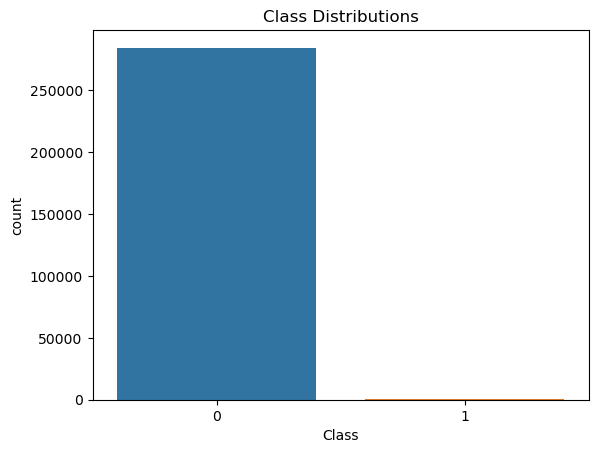

In [6]:
# unbalanced ditribution of class with help of graph 
sns.countplot(x='Class', data=data)
plt.title('Class Distributions')

In [7]:
data = data.sample(frac=1, random_state=42)  # Random state for reproducibility

# Selecting rows for fraud and non-fraud classes
fraud_df = data[data['Class'] == 1]
valid_df = data[data['Class'] == 0].sample(n=len(fraud_df), random_state=42)

In [8]:
equal_df = pd.concat([fraud_df, valid_df])

In [9]:
# Shuffle dataframe rows
credit_df = equal_df.sample(frac=1, random_state=42)

credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
280412,169518.0,-0.300026,0.949818,0.074290,0.933936,0.996314,-0.734827,1.065931,-0.046607,-0.682219,...,0.166577,0.660828,-0.253749,-0.004951,-0.059794,-0.392513,0.422035,0.234143,2.00,0
95597,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1
72197,54608.0,0.786116,-1.067510,0.917200,0.885069,-0.987685,0.989969,-0.692766,0.296164,1.200257,...,0.141353,0.412901,-0.432923,-0.366233,0.546041,0.702749,-0.008153,0.037743,207.10,0
75511,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1
255556,157284.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77,1


In [10]:
print('Count of sample')
print(credit_df['Class'].value_counts())

Count of sample
0    492
1    492
Name: Class, dtype: int64


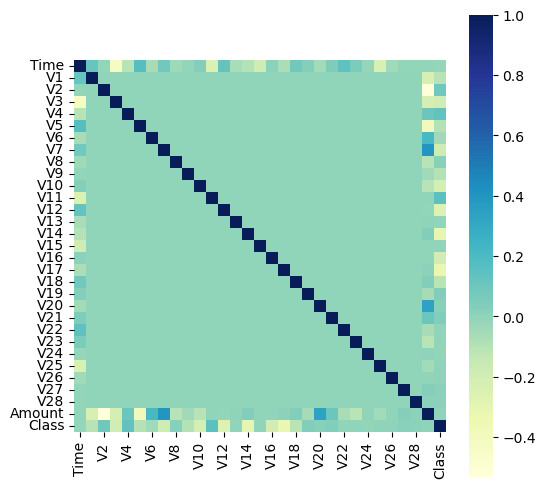

In [12]:
# Visualize correlation matrix as a heatmap
corr_matrix = data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True)
plt.show()

In [15]:
x=credit_df.drop(columns='Class',axis=1)
y=credit_df['Class']
print(x.shape) 
print(y.shape)

(984, 30)
(984,)


# Split the dataset

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [18]:
# Create Logistic Regression model
model1 = LogisticRegression(solver= 'liblinear', random_state=0, max_iter=1000)

In [19]:
# Define hyperparameter grids for each model  
model1_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}   

In [20]:
# Perform hyperparameter tuning using GridSearchCV for each model

model1_random = GridSearchCV(estimator=model1, param_grid=model1_params, cv=5)

In [21]:
# Fit GridSearchCV objects
model1_random.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=0,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']})

In [23]:
# Get best hyperparameters for each model
best_lr_params = model1_random.best_params_

In [24]:
best_lr_model = LogisticRegression(**best_lr_params, max_iter=1000, random_state=42)

In [25]:
# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logistic_regression', best_lr_model)
    ],
    voting='soft'  
)

# Train the voting classifier
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=1, max_iter=1000,
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

In [26]:
# Predict using the ensemble model on train dataset
x_pred = voting_clf.predict(x_train)

# Evaluate performance
accuracy = accuracy_score(x_pred, y_train)
precision = precision_score(x_pred, y_train)
roc_auc = roc_auc_score(x_pred, y_train)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9352
Precision: 0.8795
ROC AUC Score: 0.9408


In [28]:
# Predict using the ensemble model on test dataset
y_pred = voting_clf.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9086
Precision: 0.8431
ROC AUC Score: 0.9152


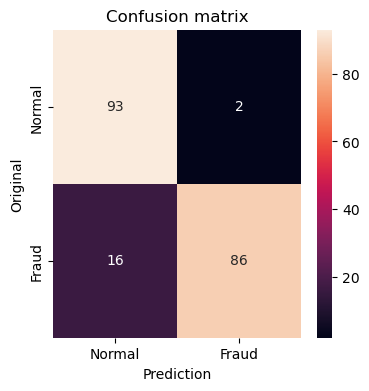

In [29]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(4, 4)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True); 
plt.title("Confusion matrix") 
plt.ylabel('Original') 
plt.xlabel('Prediction') 
plt.show() 